In [146]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [147]:
data=pd.read_csv('row_healthcare_dataset.csv',parse_dates=['Date of Admission','Discharge Date'])
data_row=data.copy()

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [149]:
#Check for missing values
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [150]:
#Check for Duplicates
data.duplicated().sum()

np.int64(534)

In [151]:
data=data.drop_duplicates()

In [152]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [153]:
data.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [154]:
#Fix Data Types
data['Gender']=data['Gender'].astype('category')
data['Admission Type']=data['Admission Type'].astype('category')
data['Test Results']=data['Test Results'].astype('category')
data['Insurance Provider']=data['Insurance Provider'].astype('category')
data['Medication']=data['Medication'].astype('category')
data['Medical Condition']=data['Medical Condition'].astype('category')
data['Blood Type']=data['Blood Type'].astype('category')
data['Room Number']=data['Room Number'].astype(str)

In [155]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [156]:
data.dtypes

Name                          object
Age                            int64
Gender                      category
Blood Type                  category
Medical Condition           category
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider          category
Billing Amount               float64
Room Number                   object
Admission Type              category
Discharge Date        datetime64[ns]
Medication                  category
Test Results                category
dtype: object

In [157]:
data.describe()

,Age,Date of Admission,Billing Amount,Discharge Date
count,54966.000000,54966,54966.000000,54966
mean,51.535185,2021-11-01 17:35:29.505512448,25544.306284,2021-11-17 05:34:28.202161408
min,13.000000,2019-05-08 00:00:00,-2008.492140,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13243.718641,2020-08-13 00:00:00
50%,52.000000,2021-11-02 00:00:00,25542.749145,2021-11-18 00:00:00
75%,68.000000,2023-02-03 00:00:00,37819.858159,2023-02-19 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,2024-06-06 00:00:00
std,19.605661,NaN,14208.409711,NaN


Q1: 13243.71864076912
Q2: 25542.749144555833
Q3: 37819.85815919015
IQR: 24576.139518421034
Lower Whisker: -23620.490636862436
Upper Whisker: 74684.0674368217


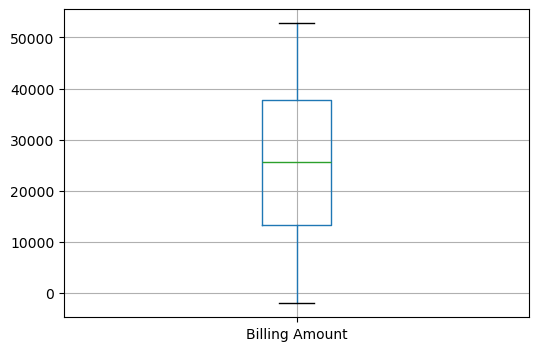

In [158]:

data.boxplot(figsize=(6,4),column=['Billing Amount'])

#Calculate quartiles and IQR
q1=data['Billing Amount'].quantile(0.25)
q2=data['Billing Amount'].quantile(0.5)
q3=data['Billing Amount'].quantile(0.75)
iqr=q3-q1 # Interquartile Range


# Calculate whiskers
whisker_max=q3+1.5*iqr
whisker_min=q1-1.5*iqr

print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Lower Whisker: {whisker_min}")
print(f"Upper Whisker: {whisker_max}")
plt.show()

#### There is no outliers in 'Billing Amount' ####

Q1: 35.0
Q2: 52.0
Q3: 68.0
IQR: 33.0
Lower Whisker: -14.5
Upper Whisker: 117.5


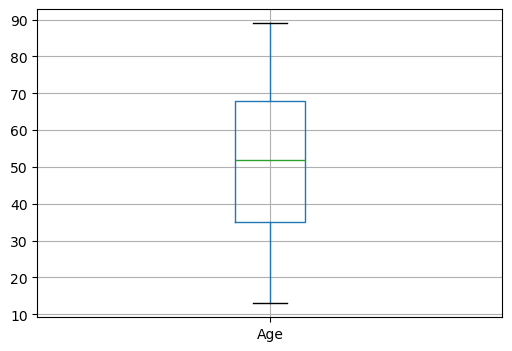

In [159]:
data.boxplot(figsize=(6,4),column=['Age'])
#Calculate quartiles by using function
def calculate_boxplot_stats(series):
    q1=series.quantile(0.25)
    q2=series.quantile(0.5)
    q3=series.quantile(0.75)
    iqr=q3-q1
    whisker_min=q1-1.5*iqr
    whisker_max=q3+1.5*iqr
    return {
        'Q1': q1,
        'Q2': q2,
        'Q3': q3,
        'IQR': iqr,
        'Lower Whisker': whisker_min,
        'Upper Whisker': whisker_max
    }
stats=calculate_boxplot_stats(data['Age'])
for key, value in stats.items():
    print(f'{key}: {value}')
    
plt.show()

#### There is no outliers in "Age" ####

In [160]:
#Clean columns
data.columns=data.columns.str.strip().str.title()
data.columns.to_list()

['Name',
 'Age',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Date Of Admission',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Billing Amount',
 'Room Number',
 'Admission Type',
 'Discharge Date',
 'Medication',
 'Test Results']

In [161]:
#String cleaning in the column 'Hospital' and creating a new column 'Provider Names'
data['Provider Names'] = (
    data['Hospital']
    .str.strip()  # remove spaces at both ends
    .str.replace(r'^[,\s]+|[,\s]+$', '', regex=True)  # remove commas/spaces from start/end
    .str.replace(r'^(and|group)\s+', '', case=False, regex=True)  # leading "and"/"group"
    .str.replace(r'\s+(and|group)$', '', case=False, regex=True)  # trailing "and"/"group"
    .str.strip(',')
    .str.strip()  # final cleanup
)



In [163]:
#Standardize Text Entries
columns_to_clean=['Name','Gender','Blood Type','Medical Condition','Doctor','Hospital','Insurance Provider','Room Number','Admission Type','Medication','Test Results']
for col in columns_to_clean:
    data[col]=data[col].str.strip().str.title()
    data[col]=data[col].astype('category')

In [164]:
data.drop(columns='Hospital',inplace=True)
data

,Name,Age,Gender,Blood Type,Medical Condition,Date Of Admission,Doctor,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Provider Names
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Sons and Miller
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Kim Inc
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Cook PLC
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Hernandez Rogers and Vang
4,Adrienne Bell,43,Female,Ab+,Cancer,2022-09-19,Kathleen Hanna,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,White-White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,Jones-Thompson
55496,Kyle Perez,61,Female,Ab-,Obesity,2020-01-23,Taylor Sullivan,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,Tucker-Moyer
55497,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,Unitedhealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,Mahoney Johnson Vasquez
55498,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,Jackson Todd and Castro


In [165]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date Of Admission,Doctor,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Provider Names
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Sons and Miller
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Kim Inc
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Cook PLC
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Hernandez Rogers and Vang
4,Adrienne Bell,43,Female,Ab+,Cancer,2022-09-19,Kathleen Hanna,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,White-White


In [166]:
#Filter invalid values
data=data[data['Age']>=0]

In [167]:
#Reset index
data.reset_index(drop=True,inplace=True)
data

,Name,Age,Gender,Blood Type,Medical Condition,Date Of Admission,Doctor,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Provider Names
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Sons and Miller
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Kim Inc
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Cook PLC
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Hernandez Rogers and Vang
4,Adrienne Bell,43,Female,Ab+,Cancer,2022-09-19,Kathleen Hanna,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,White-White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,Jones-Thompson
54962,Kyle Perez,61,Female,Ab-,Obesity,2020-01-23,Taylor Sullivan,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,Tucker-Moyer
54963,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,Unitedhealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,Mahoney Johnson Vasquez
54964,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,Jackson Todd and Castro


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  category      
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  category      
 3   Blood Type          54966 non-null  category      
 4   Medical Condition   54966 non-null  category      
 5   Date Of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  category      
 7   Insurance Provider  54966 non-null  category      
 8   Billing Amount      54966 non-null  float64       
 9   Room Number         54966 non-null  category      
 10  Admission Type      54966 non-null  category      
 11  Discharge Date      54966 non-null  datetime64[ns]
 12  Medication          54966 non-null  category      
 13  Test Results        54966 non-null  category  

In [169]:
data.to_csv('fixed_cleaned_healthcare_dataset.csv',index=False)